 # Coca-Cola Stock Price Prediction
Title and purpose of the project.

## Importing Required Libraries
Where you use import pandas as pd, import streamlit, etc.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression

## Loading Stock Data
Where yfinance or a CSV is used to load Coca-Cola stock data

In [2]:
data=pd.read_csv('Coca-Cola_stock_history.csv')

In [3]:
print(data.info())
print(data.head())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15311 entries, 0 to 15310
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          15311 non-null  object 
 1   Open          15311 non-null  float64
 2   High          15311 non-null  float64
 3   Low           15311 non-null  float64
 4   Close         15311 non-null  float64
 5   Volume        15311 non-null  int64  
 6   Dividends     15311 non-null  float64
 7   Stock Splits  15311 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 957.1+ KB
None
         Date      Open      High       Low     Close   Volume  Dividends  \
0  1962-01-02  0.050016  0.051378  0.050016  0.050016   806400        0.0   
1  1962-01-03  0.049273  0.049273  0.048159  0.048902  1574400        0.0   
2  1962-01-04  0.049026  0.049645  0.049026  0.049273   844800        0.0   
3  1962-01-05  0.049273  0.049892  0.048035  0.048159  1420800        0.0   
4  1962-

In [4]:
data.fillna(method='ffill', inplace=True) 
data.fillna(0, inplace=True)

C:\Users\ARJAV JAIN\AppData\Local\Temp\ipykernel_11300\3922265724.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [5]:
data['MA_20'] = data['Close'].rolling(window=20).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()

In [6]:
data['Daily_Return'] = data['Close'].pct_change()


In [7]:
data['Volatility'] = data['Daily_Return'].rolling(window=20).std()


In [8]:
data.dropna(inplace=True)
print(data.head())


          Date      Open      High       Low     Close   Volume  Dividends  \
49  1962-03-13  0.046416  0.046789  0.046416  0.046789  1344000   0.001563   
50  1962-03-14  0.046789  0.046976  0.046603  0.046852  1689600   0.000000   
51  1962-03-15  0.046852  0.046976  0.046603  0.046603   883200   0.000000   
52  1962-03-16  0.046603  0.046789  0.046603  0.046603   768000   0.000000   
53  1962-03-19  0.046603  0.047101  0.046603  0.046852   921600   0.000000   

    Stock Splits     MA_20     MA_50  Daily_Return  Volatility  
49             0  0.045788  0.046525      0.015962    0.013223  
50             0  0.045797  0.046461      0.001334    0.013226  
51             0  0.045836  0.046415     -0.005320    0.012546  
52             0  0.045889  0.046362      0.000000    0.012460  
53             0  0.045953  0.046336      0.005348    0.012491  


## Visualizing the Data

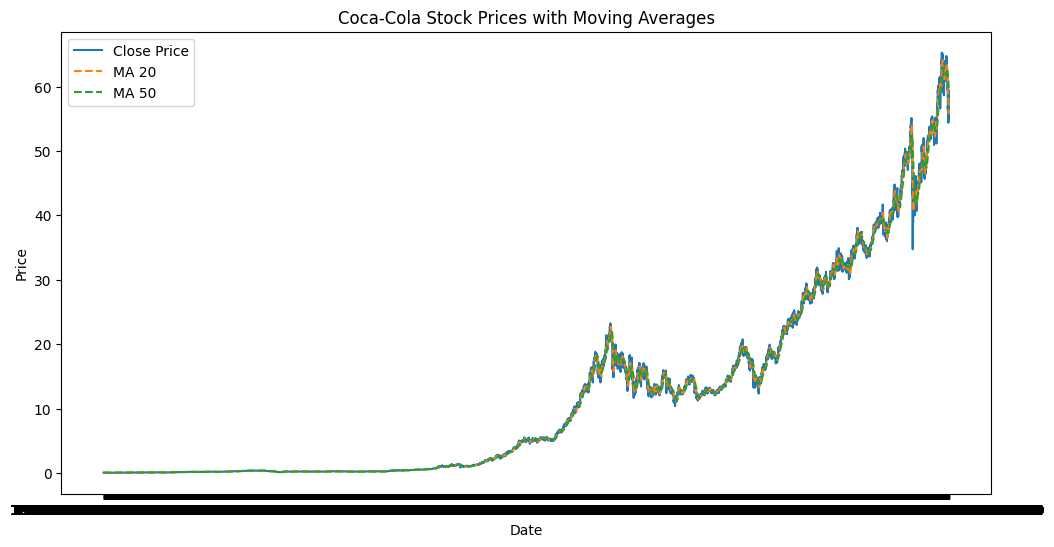

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.plot(data['Date'], data['MA_20'], label='MA 20',linestyle='--')
plt.plot(data['Date'], data['MA_50'], label='MA 50',linestyle='--')
plt.title('Coca-Cola Stock Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [10]:
data['Date'] = pd.to_datetime(data['Date'], format='mixed')

C:\Users\ARJAV JAIN\AppData\Local\Temp\ipykernel_11300\191006596.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  data['Date'] = pd.to_datetime(data['Date'], format='mixed')


In [11]:
data = data.drop(columns=['Date'])


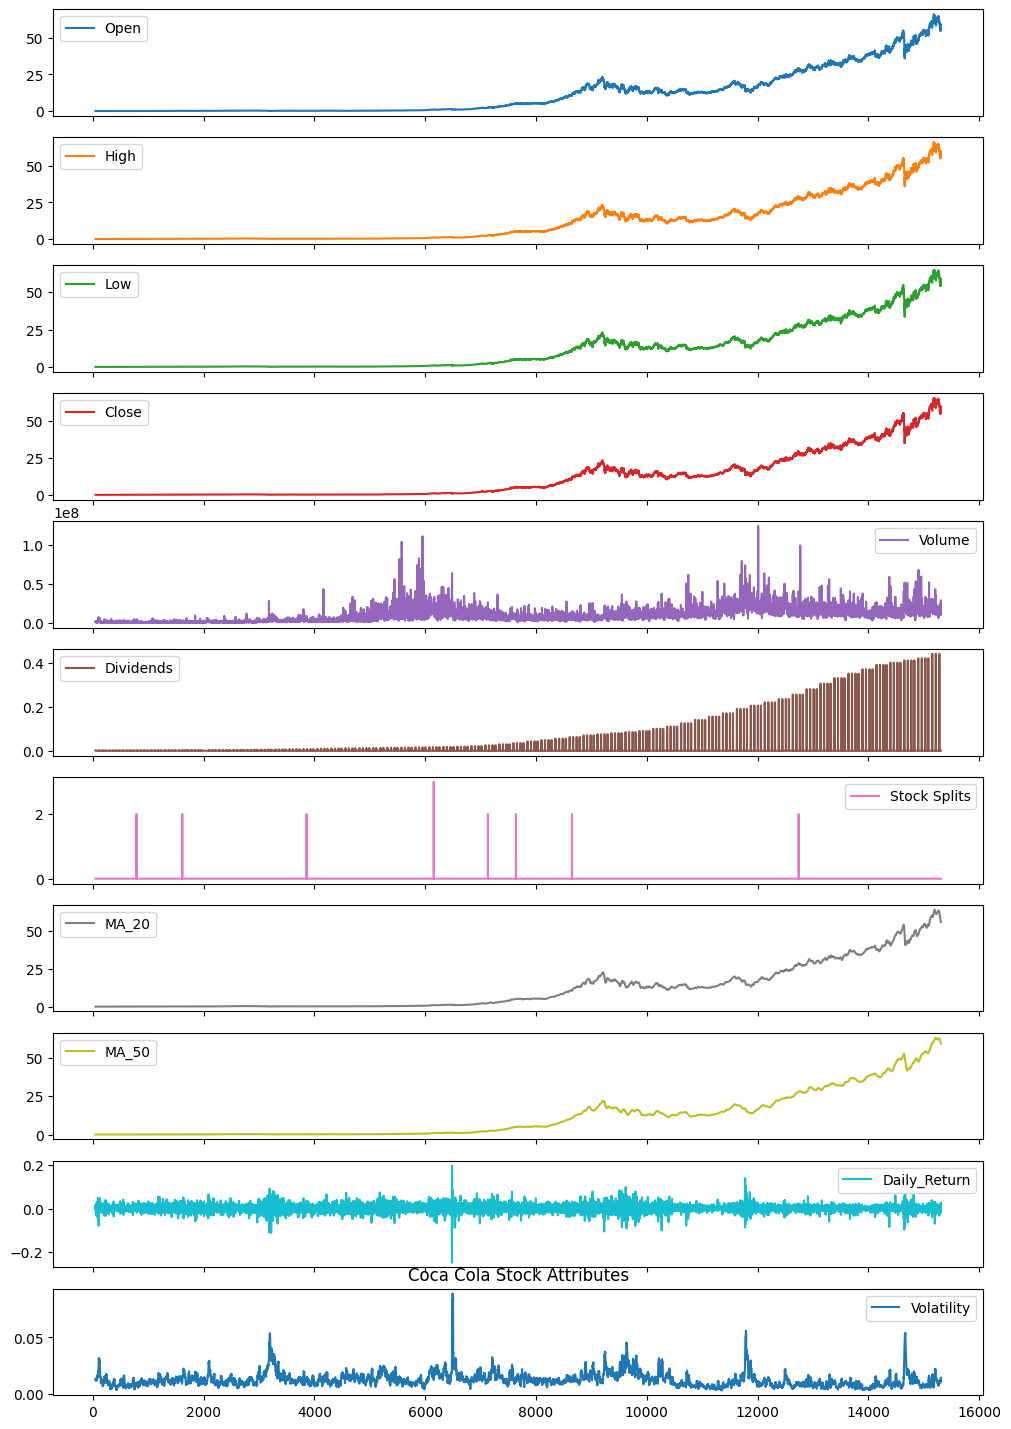

In [23]:
data.plot(subplots = True, figsize = (12,18))
plt.title('Coca Cola Stock Attributes')
plt.show()

In [24]:
data['MA20']=data['Close'].rolling(window=20).mean()
data['MA50']=data['Close'].rolling(window=50).mean()
data['Daily_Return'] = data['Close'].pct_change()
data['Volatility'] =data['Daily_Return'].rolling(window=20).std()

In [25]:
print(data.isnull().sum())

Open             0
High             0
Low              0
Close            0
Volume           0
Dividends        0
Stock Splits     0
MA_20            0
MA_50            0
Daily_Return     1
Volatility      20
MA20            19
MA50            49
dtype: int64


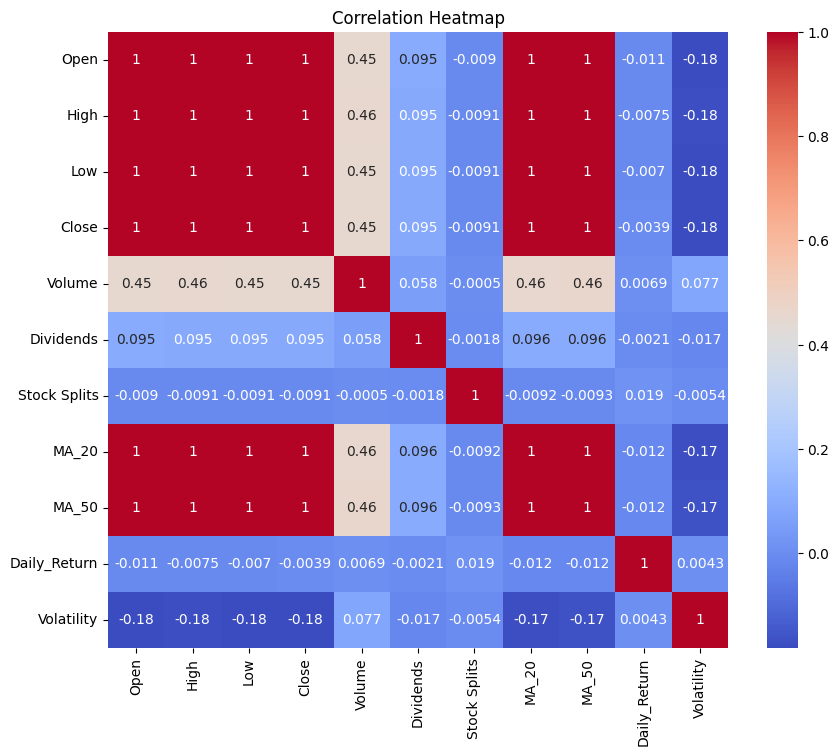

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Building the Prediction Model

In [13]:
features = ['Open', 'High', 'Low', 'Volume', 'Dividends','Stock Splits', 'MA_20', 'MA_50', 'Daily_Return', 'Volatility']
target = 'Close'
x = data[features]
y = data[target]

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42, shuffle=False)


In [15]:
model = RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


In [16]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")


Mean Squared Error: 327.97684970501126
Mean Absolute Error: 14.669394395869661


In [17]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 327.97684970501126
R^2 Score: -1.8572843190762973


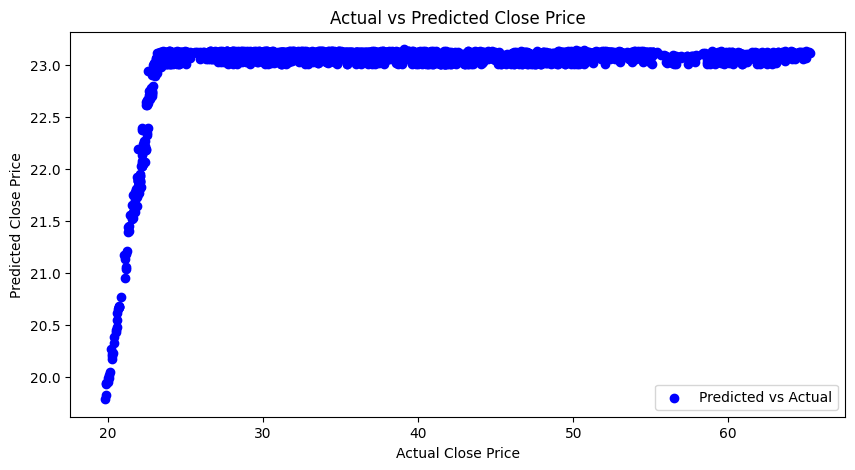

In [18]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.show()

In [19]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [20]:
y_pred = lr.predict(x_test)
lr.score(x_test,y_test)


0.9997454394790642

In [21]:
print("Mean Squared Error:", mean_squared_error(y_test,
y_pred))
print("R-Squared Score:", r2_score(y_test, y_pred))

Mean Squared Error: 0.02922003846742957
R-Squared Score: 0.9997454394790642


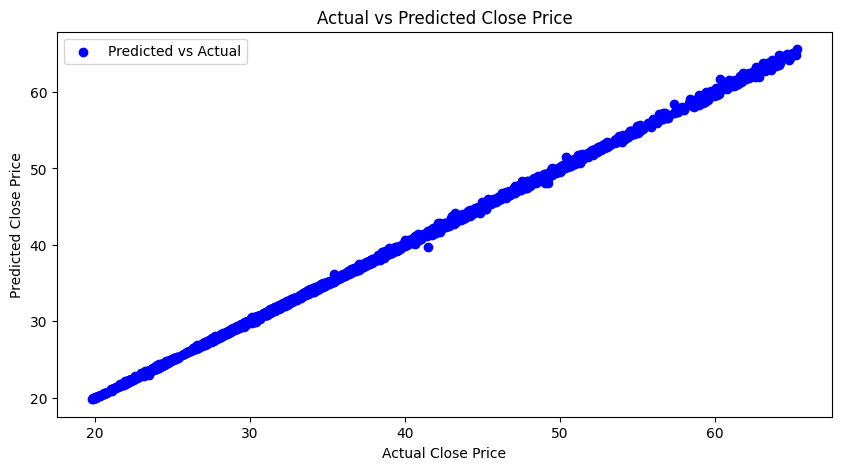

In [22]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.show()

## Predicting the Stock Price

In [29]:
import yfinance as yf

ticker = 'KO'  # Coca-Cola
live_data = yf.download(ticker, period='1d', interval='1m')
print(live_data.tail())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price                          Close       High        Low       Open  Volume
Ticker                            KO         KO         KO         KO      KO
Datetime                                                                     
2025-05-02 19:55:00+00:00  71.650002  71.690002  71.629997  71.690002   92897
2025-05-02 19:56:00+00:00  71.690002  71.699997  71.635002  71.654999  117737
2025-05-02 19:57:00+00:00  71.730003  71.739998  71.669998  71.690002  129317
2025-05-02 19:58:00+00:00  71.660103  71.745003  71.660004  71.735001  157806
2025-05-02 19:59:00+00:00  71.654999  71.730003  71.650002  71.660004  293028


In [30]:
print(live_data.head())
live_data.shape


Price                          Close       High        Low       Open  Volume
Ticker                            KO         KO         KO         KO      KO
Datetime                                                                     
2025-05-02 13:30:00+00:00  71.470001  71.599998  71.379997  71.500000  424232
2025-05-02 13:31:00+00:00  71.629997  71.730003  71.449997  71.474998  103950
2025-05-02 13:32:00+00:00  71.582497  71.690002  71.550003  71.620003   49431
2025-05-02 13:33:00+00:00  71.660004  71.720001  71.559998  71.584999   54967
2025-05-02 13:34:00+00:00  71.559998  71.699997  71.529999  71.699997   52312


(390, 5)

In [31]:
print(live_data.tail())

Price                          Close       High        Low       Open  Volume
Ticker                            KO         KO         KO         KO      KO
Datetime                                                                     
2025-05-02 19:55:00+00:00  71.650002  71.690002  71.629997  71.690002   92897
2025-05-02 19:56:00+00:00  71.690002  71.699997  71.635002  71.654999  117737
2025-05-02 19:57:00+00:00  71.730003  71.739998  71.669998  71.690002  129317
2025-05-02 19:58:00+00:00  71.660103  71.745003  71.660004  71.735001  157806
2025-05-02 19:59:00+00:00  71.654999  71.730003  71.650002  71.660004  293028


In [32]:
print(live_data)

Price                          Close       High        Low       Open  Volume
Ticker                            KO         KO         KO         KO      KO
Datetime                                                                     
2025-05-02 13:30:00+00:00  71.470001  71.599998  71.379997  71.500000  424232
2025-05-02 13:31:00+00:00  71.629997  71.730003  71.449997  71.474998  103950
2025-05-02 13:32:00+00:00  71.582497  71.690002  71.550003  71.620003   49431
2025-05-02 13:33:00+00:00  71.660004  71.720001  71.559998  71.584999   54967
2025-05-02 13:34:00+00:00  71.559998  71.699997  71.529999  71.699997   52312
...                              ...        ...        ...        ...     ...
2025-05-02 19:55:00+00:00  71.650002  71.690002  71.629997  71.690002   92897
2025-05-02 19:56:00+00:00  71.690002  71.699997  71.635002  71.654999  117737
2025-05-02 19:57:00+00:00  71.730003  71.739998  71.669998  71.690002  129317
2025-05-02 19:58:00+00:00  71.660103  71.745003  71.660004  71.7

In [33]:
live_data['MA20']=live_data['Close'].rolling(window=20).mean()
live_data['MA50']=live_data['Close'].rolling(window=50).mean()
live_data['Daily_Return']=live_data['Close'].pct_change()
live_data['Volatility']=live_data['Daily_Return'].rolling(window=20).std()

In [34]:
print(live_data.isnull().sum())

Price         Ticker
Close         KO         0
High          KO         0
Low           KO         0
Open          KO         0
Volume        KO         0
MA20                    19
MA50                    49
Daily_Return             1
Volatility              20
dtype: int64


In [35]:
live_data.fillna(0,inplace=True)

In [36]:
print(live_data.isnull().sum())

Price         Ticker
Close         KO        0
High          KO        0
Low           KO        0
Open          KO        0
Volume        KO        0
MA20                    0
MA50                    0
Daily_Return            0
Volatility              0
dtype: int64


 ## Displaying the Prediction

Coca-Cola Stock Price Prediction


[*********************100%***********************]  1 of 1 completed


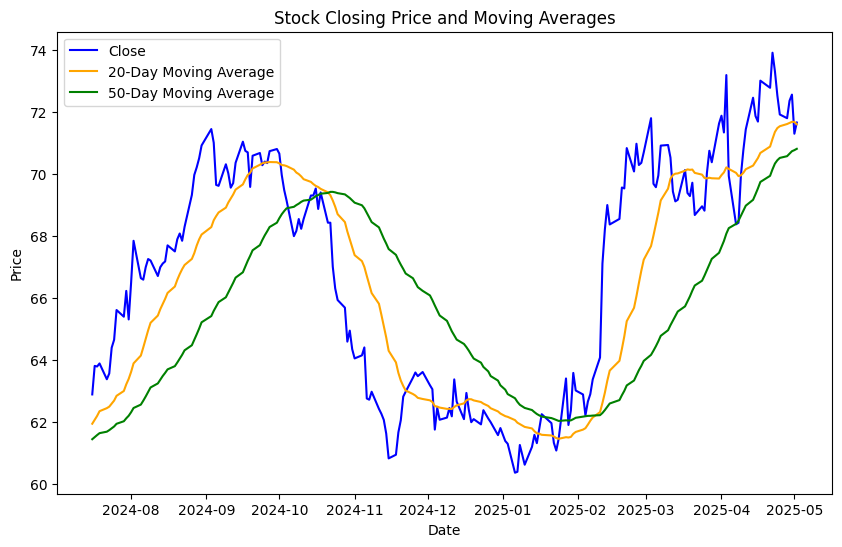


Predicted Closing Price for Next Day: $68.14

Raw Data:
                Close    High KO     Low KO    Open KO  Volume KO       MA20  \
Date                                                                           
2024-07-16  62.887802  62.926943  62.026730  62.065871    9025100  61.943561   
2024-07-17  63.807594  63.983724  63.024804  63.083511   12508200  62.070276   
2024-07-18  63.788029  64.394690  63.328135  63.406417   11128200  62.195523   
2024-07-19  63.885872  64.228343  63.425979  64.228343   13775700  62.347679   
2024-07-22  63.377052  63.885873  62.936733  63.846733   11794200  62.445528   
...               ...        ...        ...        ...        ...        ...   
2025-04-28  71.790001  72.260002  71.309998  72.080002   15997500  71.602000   
2025-04-29  72.349998  72.709999  70.279999  71.190002   16244100  71.638500   
2025-04-30  72.550003  73.480003  71.690002  73.349998   21074700  71.672500   
2025-05-01  71.290001  72.040001  71.230003  72.000000   180342

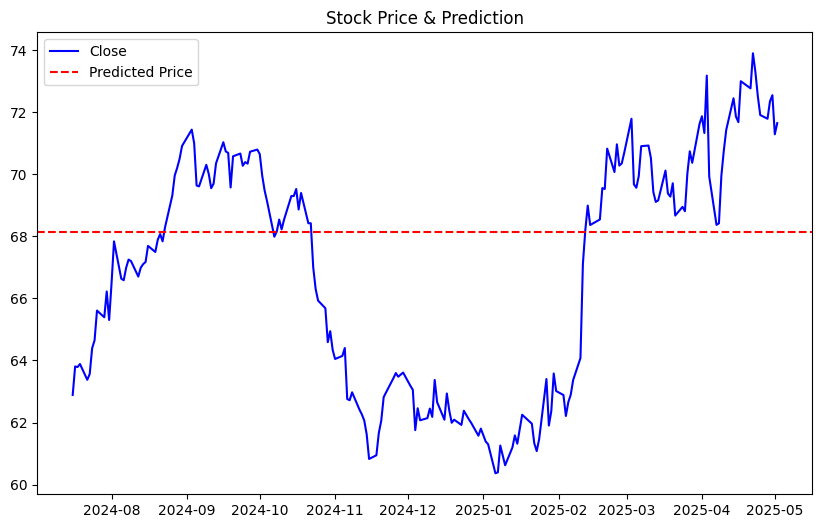

In [42]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import datetime

# Title (Printing manually)
print("Coca-Cola Stock Price Prediction")

# Load Coca-Cola data
ticker = 'KO'
df = yf.download(ticker, period='1y')

# If df has MultiIndex columns (like ('Close', 'KO')), flatten them
if isinstance(df.columns, pd.MultiIndex):
    df.columns = [' '.join(col).strip() for col in df.columns.values]

# Rename 'Close KO' to 'Close' if needed
for col in df.columns:
    if 'Close' in col:
        df.rename(columns={col: 'Close'}, inplace=True)

# Calculate Moving Averages
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()

# Drop rows with NaNs (caused by moving average)
df = df.dropna()

# Show Line Chart (using matplotlib)
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='Close', color='blue')
plt.plot(df.index, df['MA20'], label='20-Day Moving Average', color='orange')
plt.plot(df.index, df['MA50'], label='50-Day Moving Average', color='green')
plt.title('Stock Closing Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Prepare data for prediction
X = np.arange(len(df)).reshape(-1, 1)
y = df['Close'].values

# Train simple linear regression
model = LinearRegression()
model.fit(X, y)

# Predict next day's closing price
next_day = np.array([[len(df)]])
live_prediction = model.predict(next_day)

# Display prediction
print(f"\nPredicted Closing Price for Next Day: ${live_prediction[0]:.2f}")

# Show Raw Data
print("\nRaw Data:")
print(df)

# Predicted date
next_date = df.index[-1] + datetime.timedelta(days=1)
print(f"Predicted Price on {next_date.date()}: ${live_prediction[0]:.2f}")

# Plotting the stock price with the prediction (using matplotlib)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df.index, df['Close'], label='Close', color='blue')
ax.axhline(live_prediction[0], color='red', linestyle='--', label='Predicted Price')
ax.set_title('Stock Price & Prediction')
ax.legend()
plt.show()
